### Here we test louis busted h5 file

In [1]:
import sys
from sys import byteorder
import warnings
import numpy as np
import h5py
import tables as tb
import pandas as pd

import matplotlib.pyplot as plt

sys.path.append("/home/e78368jw/Documents/MULE/")
import packs.proc.processing_utils as procutil

In [21]:
path2 = '/home/e78368jw/Documents/MULE_testing/test_dir/real_file_1.bin'
#path2 = '/home/e78368jw/Documents/MULE_testing/test_dir/louis_busted_file.bin'

In [22]:
file = open(path2, 'rb')

In [23]:
# lets take some data from the file
array = np.fromfile(file, dtype = 'i4', count = 6)
print(array)
file.close()

[       1 37892305        0      501       16        0]


define the wdtype to see whats happening

In [40]:
wdtype = np.dtype([
        ('Event number', np.uint32), 
        ('Timestamp', np.uint64), 
        ('Samples', np.uint32), 
        ('Sampling Period', np.uint64), 
        ('Channels', np.int32),     # this is removed if 'one file per channel' is selected
        ('data', np.float32, (8024*2)),
        ])


In [41]:
file = open(path2, 'rb')
data = np.fromfile(file, dtype=wdtype)
print(data[0])
print(data[0][2])
print(data[1])
print(data[-1])


(1, 37892305, 501, 16, 32, [ 1.5875826e-29,  1.5900083e-29,  1.5900083e-29, ..., -2.5396826e+01, -2.5885225e+01, -2.5396826e+01])
501
(2, 97187961, 501, 16, 32, [ 1.58758257e-29,  1.59000834e-29,  1.59000834e-29, ..., -2.53968258e+01, -2.58852253e+01, -2.58852253e+01])
(21, 1276100069, 501, 16, 32, [ 1.58758257e-29,  1.59000834e-29,  1.59000834e-29, ..., -2.58852253e+01, -2.58852253e+01, -2.58852253e+01])


In [75]:
print(len(data[0][-1]))
print(len(data[1][-1]))
print(split_arr[0])
print(split_arr[1])

16048
16048
[1.5875826e-29 1.5900083e-29 1.5900083e-29 1.5900083e-29 1.5900083e-29
 1.5900083e-29 1.5900083e-29 1.5900083e-29 1.5900276e-29 1.5900083e-29
 1.5900083e-29 1.5900083e-29 1.5900083e-29 1.5900083e-29 1.5900083e-29
 1.5900083e-29 1.5900083e-29 1.5900276e-29 1.5900083e-29 1.5900083e-29
 1.5900083e-29 1.5900083e-29 1.5900083e-29 1.5900083e-29 1.5900083e-29
 1.5900276e-29 1.5900276e-29 1.5900083e-29 1.5900083e-29 1.5900276e-29
 1.5900083e-29 1.5900083e-29 1.5900083e-29 1.5900083e-29 1.5900083e-29
 1.5900083e-29 1.5900083e-29 1.5900083e-29 1.5900083e-29 1.5900083e-29
 1.5900083e-29 1.5900276e-29 1.5900083e-29 1.5900083e-29 1.5900083e-29
 1.5900083e-29 1.5900083e-29 1.5900083e-29 1.5900083e-29 1.5900083e-29
 1.5900083e-29 1.5900083e-29 1.5900083e-29 1.5900276e-29 1.5900083e-29
 1.5900083e-29 1.5900083e-29 1.5900083e-29 1.5900083e-29 1.5900083e-29
 1.5900083e-29 1.5900083e-29 1.5900083e-29 1.5900083e-29 1.5900083e-29
 1.5900083e-29 1.5900276e-29 1.5900083e-29 1.5900083e-29 1.590027

In [28]:
from tqdm import tqdm

for i in tqdm(range(1, 501*100)):
    wdtype = np.dtype([
        ('Event number', np.uint32), 
        ('Timestamp', np.uint64), 
        ('Samples', np.uint32), 
        ('Sampling Period', np.uint64), 
        ('Channels', np.int32),     # this is removed if 'one file per channel' is selected
        ('data', np.float32, (i)),
        ])
    file = open(path2, 'rb')
    data = np.fromfile(file, dtype=wdtype)
    # check second entry to check if the right element makes sense
    if data[1][2] == 501:
        print(f"CORRECT ENTRY @ {i}")
        break
    file.close()

  0%|          | 0/50099 [00:00<?, ?it/s]

/tmp/ipykernel_47223/3617845204.py:4: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  wdtype = np.dtype([
 32%|███▏      | 16047/50099 [00:02<00:04, 7411.43it/s]

CORRECT ENTRY @ 16048


TypeError: '_io.BufferedReader' object is not subscriptable

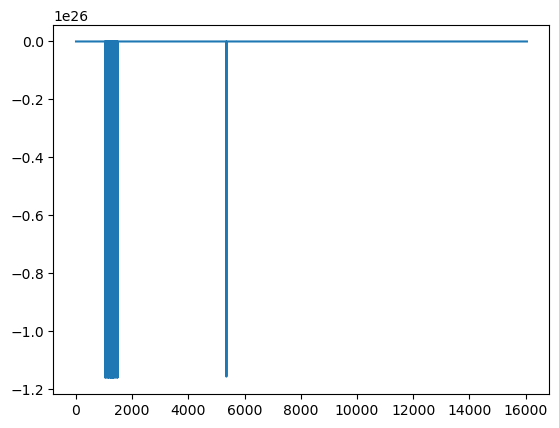

In [62]:
wf_test = data[0][-1]
x = np.linspace(0, len(wf_test), len(wf_test))
plt.plot(x, wf_test)

In [65]:
qqq = 'sally'
print(qqq[4:])

y


EVENT 0
Samples: 502


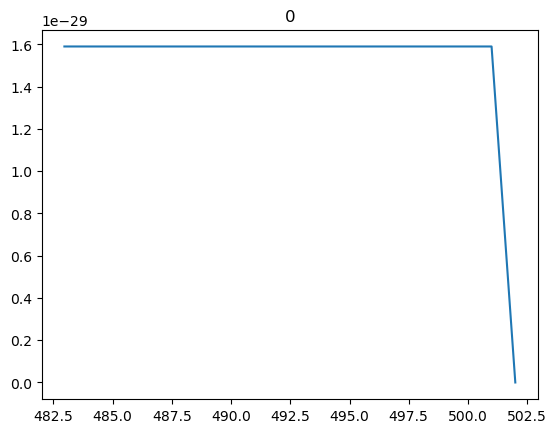

EVENT 1
Samples: 502


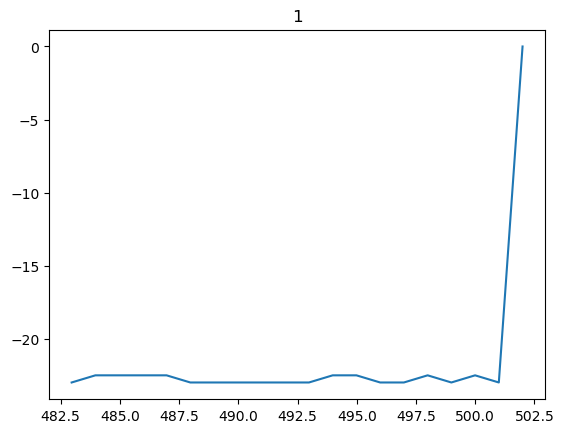

EVENT 2
Samples: 502


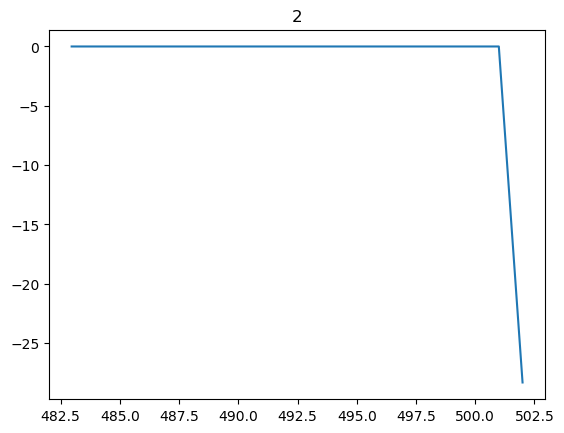

EVENT 3
Samples: 502


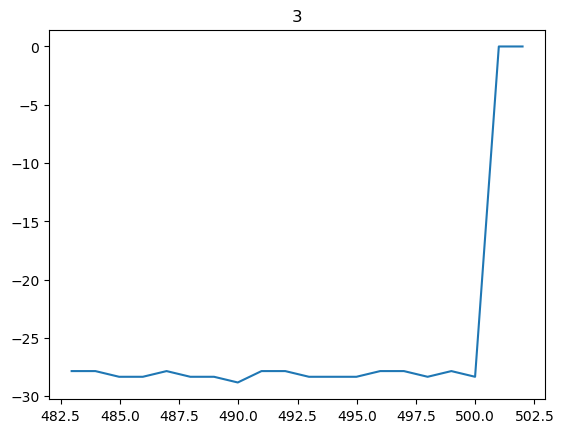

EVENT 4
Samples: 502


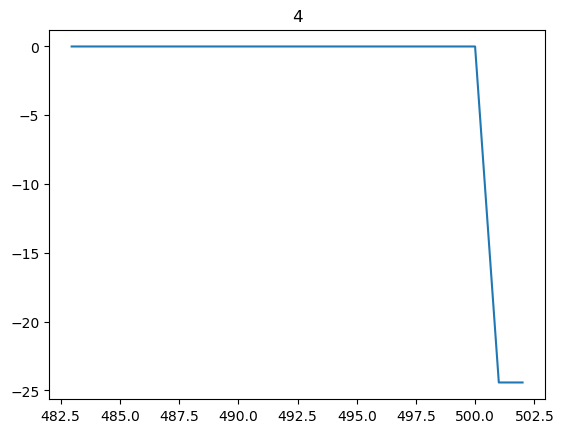

EVENT 5
Samples: 502


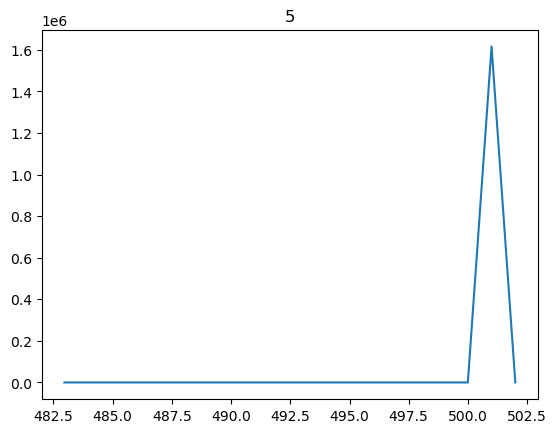

EVENT 6
Samples: 502


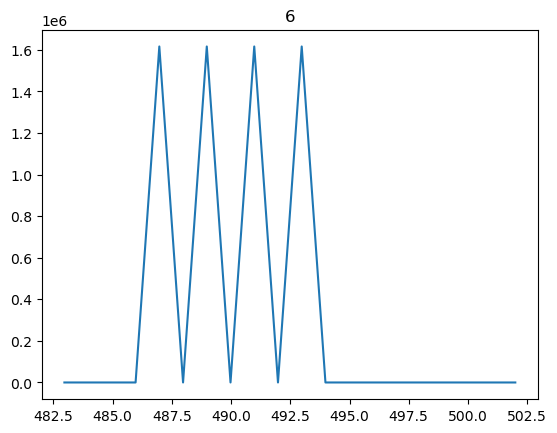

EVENT 7
Samples: 502


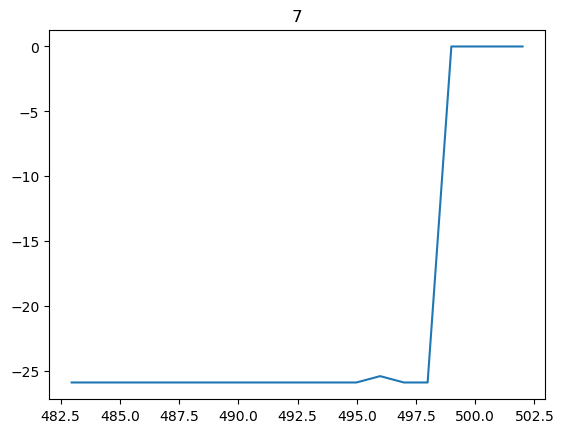

EVENT 8
Samples: 502


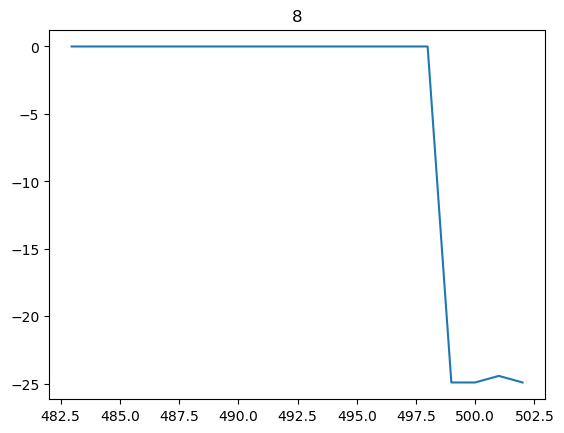

EVENT 9
Samples: 502


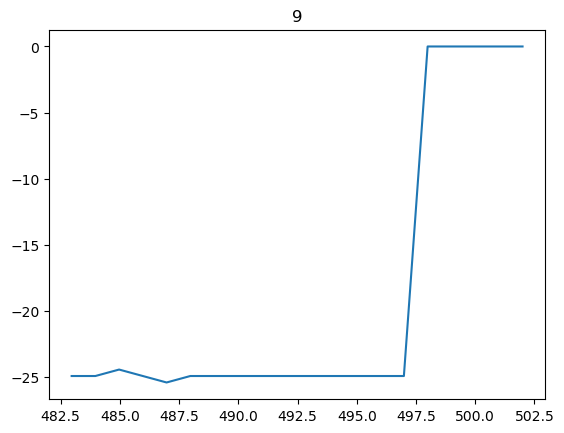

EVENT 10
Samples: 502


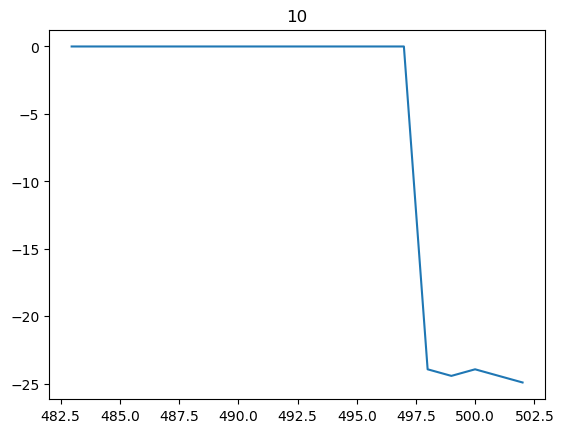

EVENT 11
Samples: 502


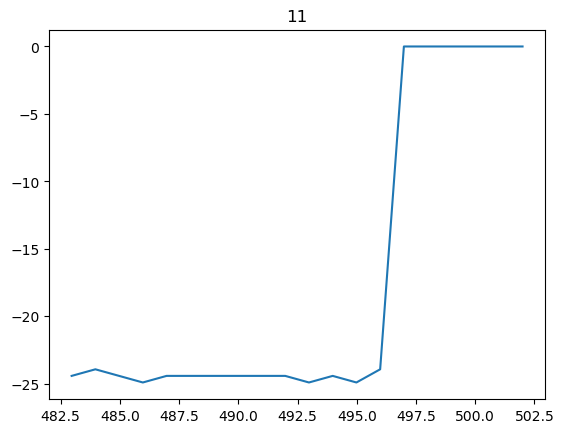

EVENT 12
Samples: 502


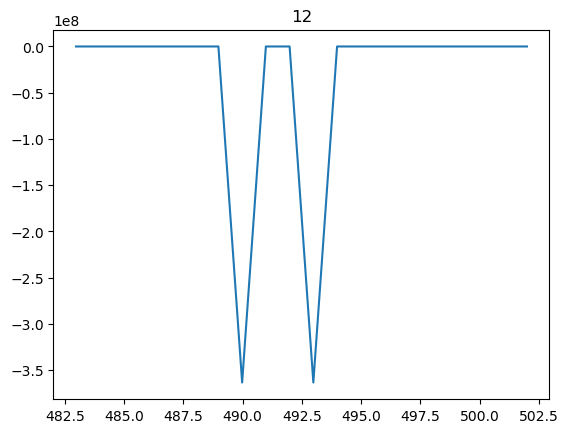

EVENT 13
Samples: 502


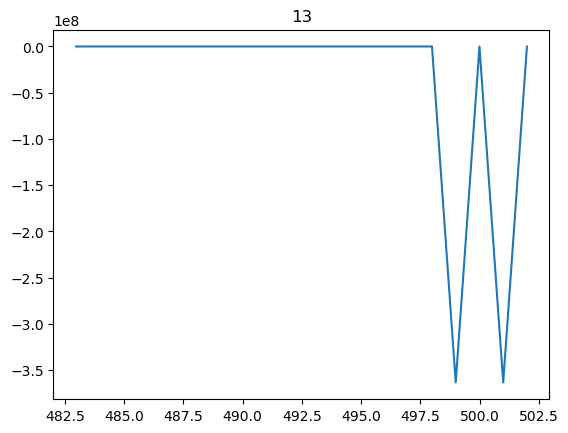

EVENT 14
Samples: 502


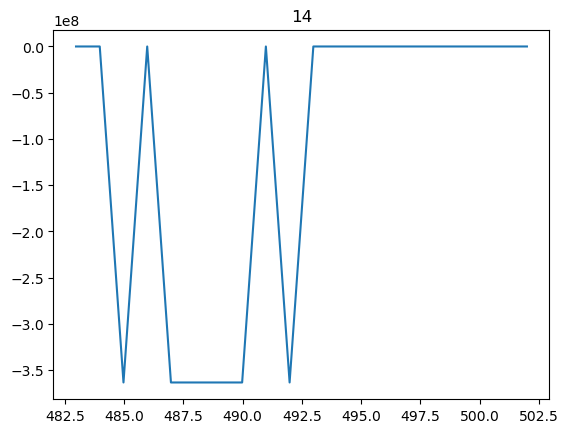

EVENT 15
Samples: 502


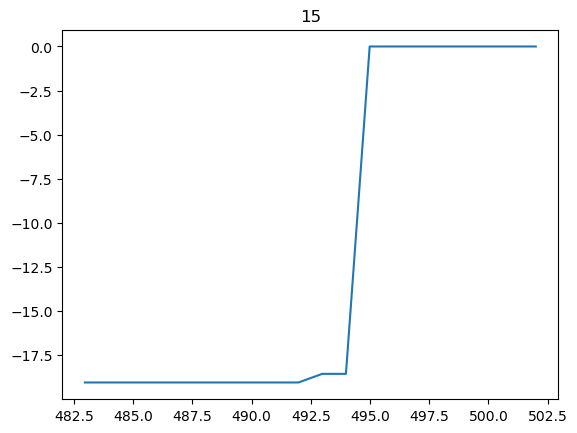

EVENT 16
Samples: 501


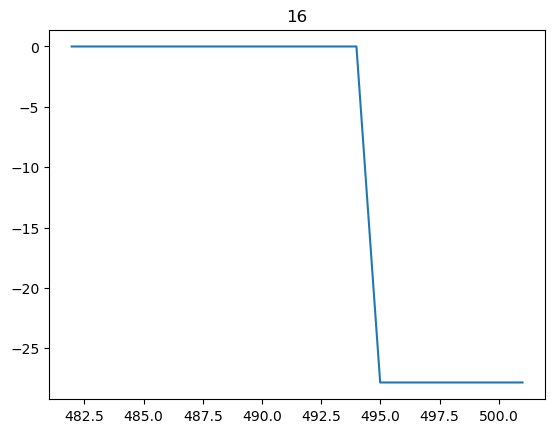

EVENT 17
Samples: 501


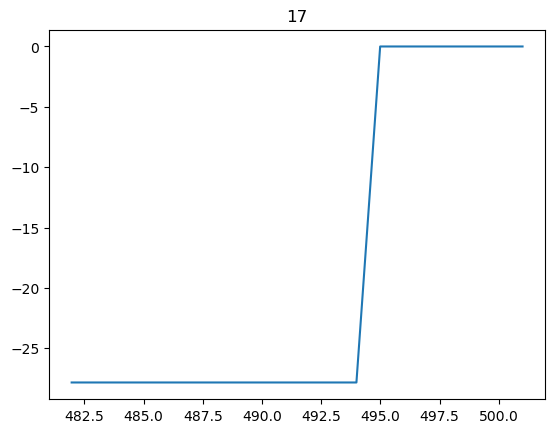

EVENT 18
Samples: 501


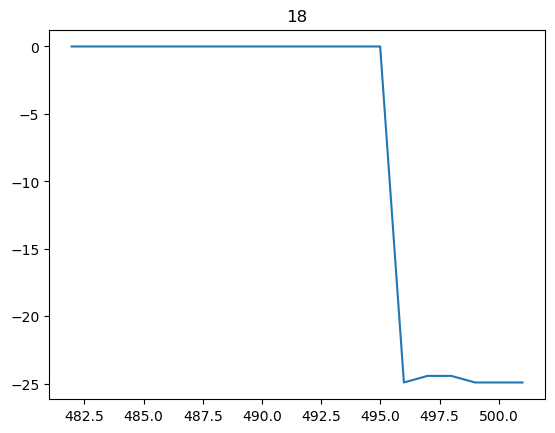

EVENT 19
Samples: 501


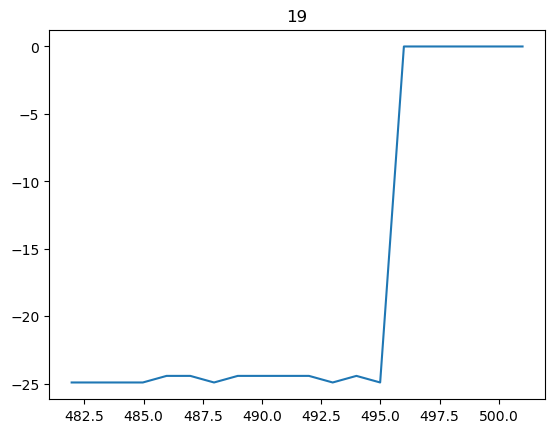

EVENT 20
Samples: 501


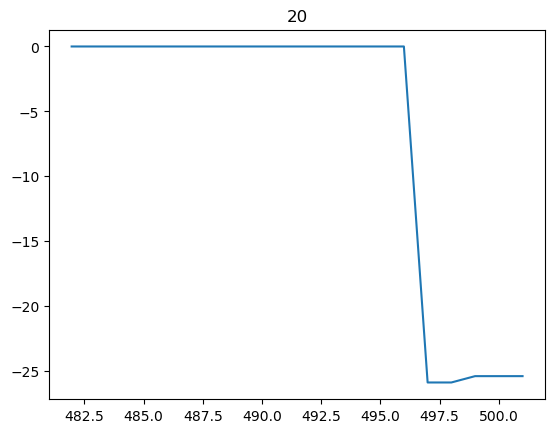

EVENT 21
Samples: 501


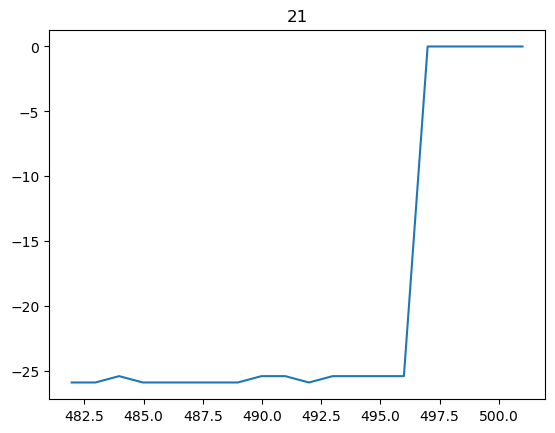

EVENT 22
Samples: 501


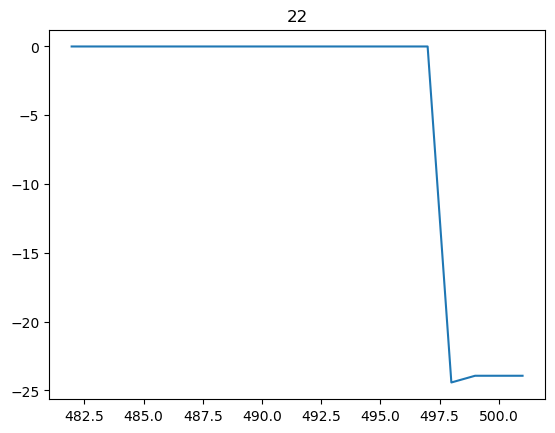

EVENT 23
Samples: 501


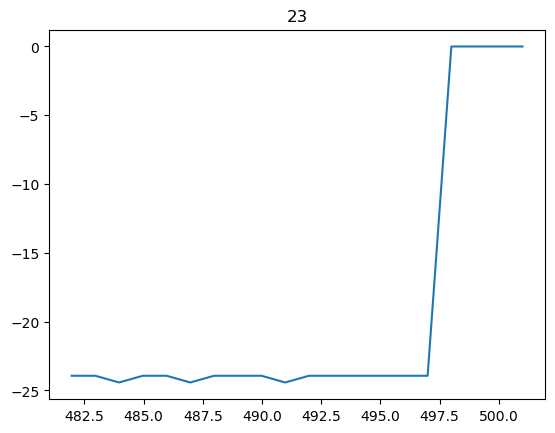

EVENT 24
Samples: 501


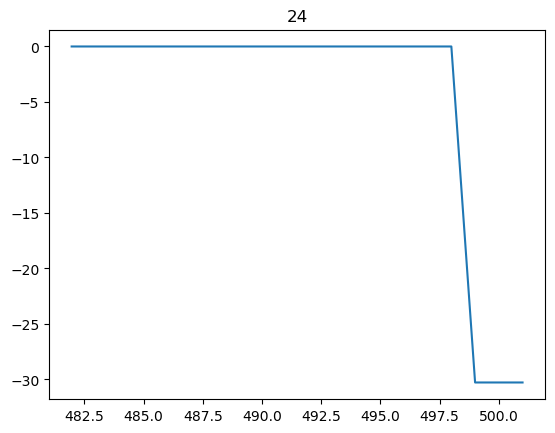

EVENT 25
Samples: 501


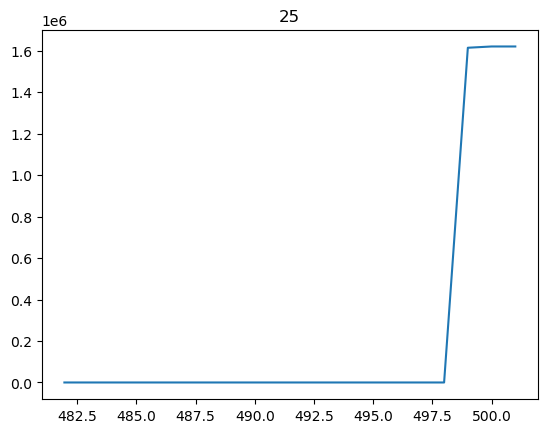

EVENT 26
Samples: 501


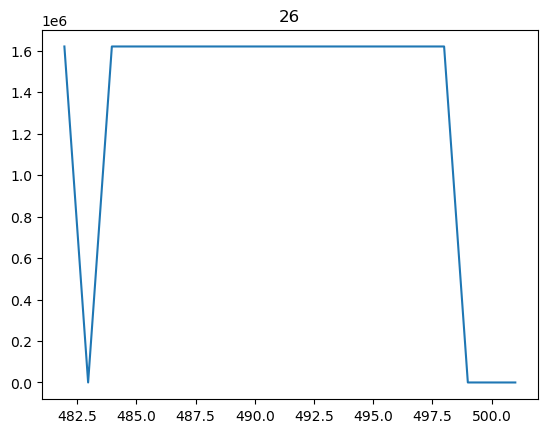

EVENT 27
Samples: 501


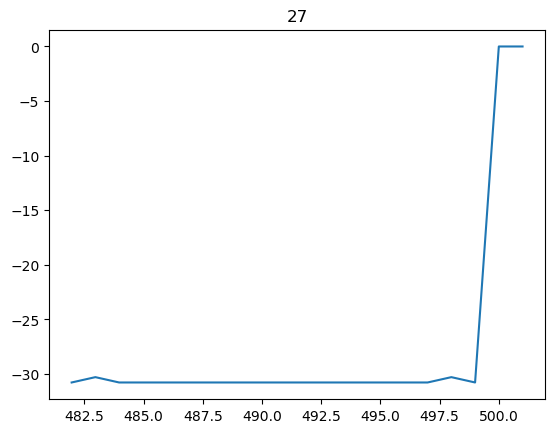

EVENT 28
Samples: 501


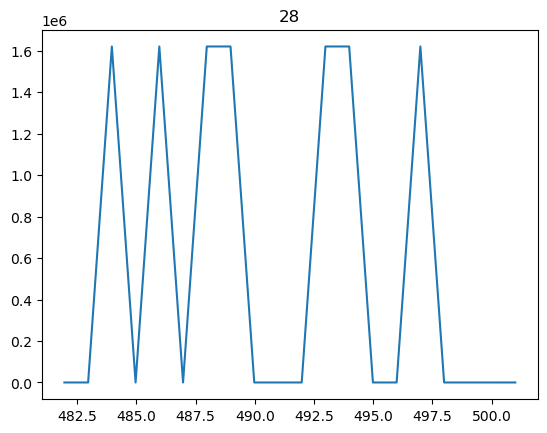

EVENT 29
Samples: 501


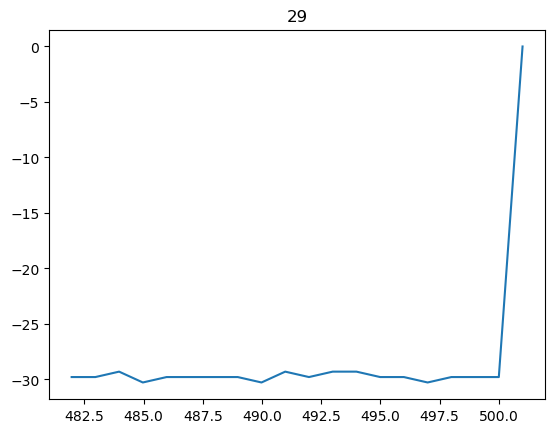

EVENT 30
Samples: 501


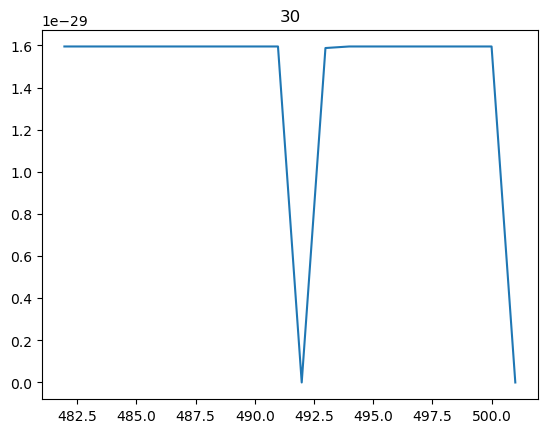

EVENT 31
Samples: 501


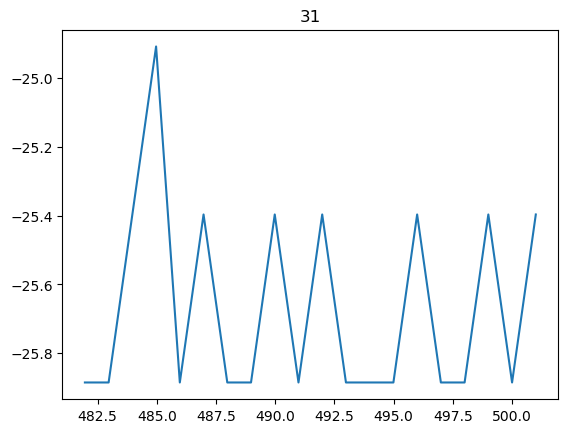

In [71]:
split_arr = np.array_split(wf_test, 32)

for i in range(len(split_arr)):
    print("==================================")
    print(f"EVENT {i}")
    print("==================================")
    print(f"Samples: {len(split_arr[i])}")
    
    x = np.linspace(0, len(split_arr[i]), len(split_arr[i]))
    plt.plot(x[-20:], split_arr[i][-20:])
    plt.title(f"{i}")
    plt.show()
    